In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns

In [2]:
df = pd.read_excel("Downloads/data.xlsx")

In [3]:
df.isna().sum()

Fiber Type                    0
Fiber Concentration           0
Aging                         0
Additive Type                 0
Additive Concentration        0
Compressive Strength (MPa)    0
Flexural Strength (MPa)       0
dtype: int64

In [4]:
df.head()

,Fiber Type,Fiber Concentration,Aging,Additive Type,Additive Concentration,Compressive Strength (MPa),Flexural Strength (MPa)
0,Carbon fiber,0,2,Expanded Clay Powder,0,13.2,13.7
1,Carbon fiber,0,2,Expanded Clay Powder,5,11.9,13.9
2,Carbon fiber,0,2,Expanded Clay Powder,10,12.3,11.8
3,Carbon fiber,0,2,Expanded Clay Powder,20,13.1,12.5
4,Carbon fiber,0,2,Fly Ash,0,11.5,13.7


In [5]:
print(df['Fiber Type'].nunique())
print(df['Fiber Type'].value_counts())

4
Fiber Type
Carbon fiber    256
PP fiber        256
Basalt fiber    256
Steel fiber     256
Name: count, dtype: int64


In [6]:
print(df['Additive Type'].nunique())
print(df['Additive Type'].value_counts())

4
Additive Type
Expanded Clay Powder    256
Fly Ash                 256
Perlite Powder          256
Expanded Vermiculite    256
Name: count, dtype: int64


In [7]:
df.describe()

,Fiber Concentration,Aging,Additive Concentration,Compressive Strength (MPa),Flexural Strength (MPa)
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,2.250000,75.000000,8.750000,27.718164,22.715820
std,1.921225,68.568151,7.398713,13.269206,9.776267
min,0.000000,2.000000,0.000000,2.000000,-1.000000
25%,0.750000,21.500000,3.750000,15.025000,16.075000
50%,2.000000,59.000000,7.500000,24.750000,22.300000
75%,3.500000,112.500000,12.500000,40.925000,29.900000
max,5.000000,180.000000,20.000000,112.000000,47.400000


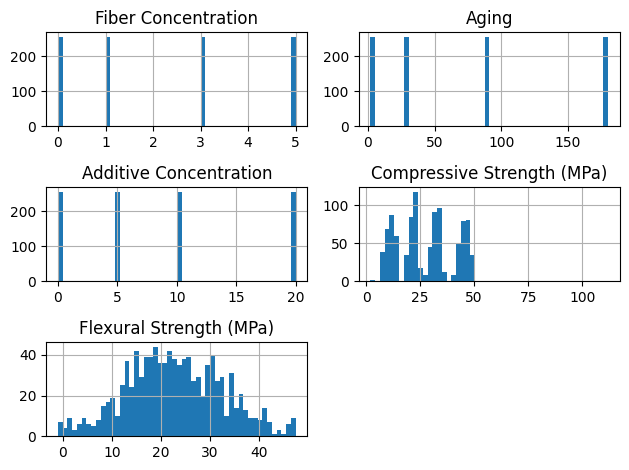

In [8]:
df.hist(bins=50)
plt.tight_layout()

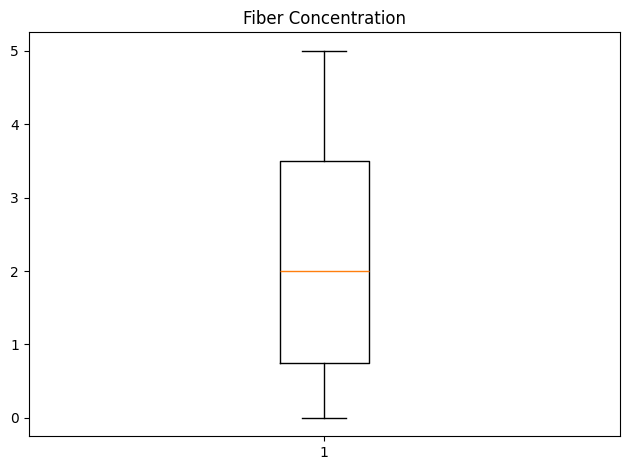

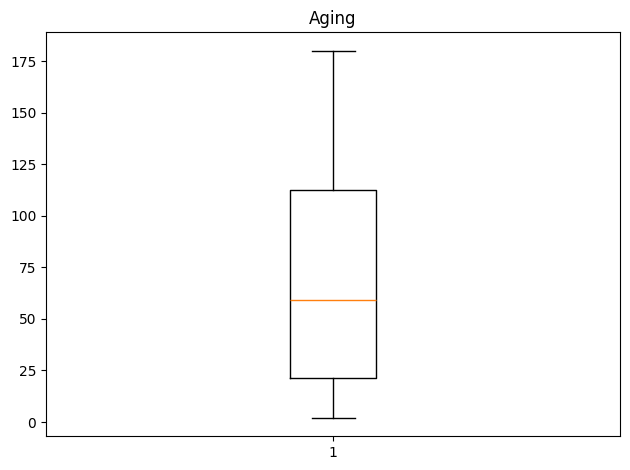

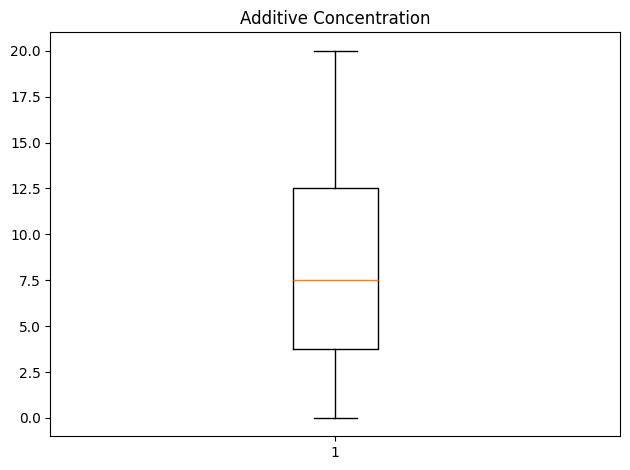

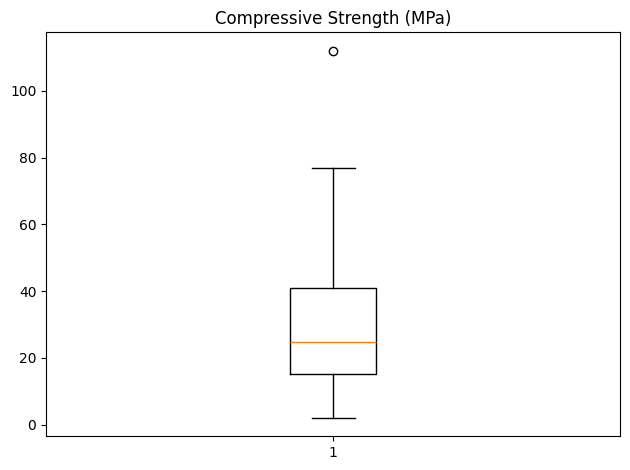

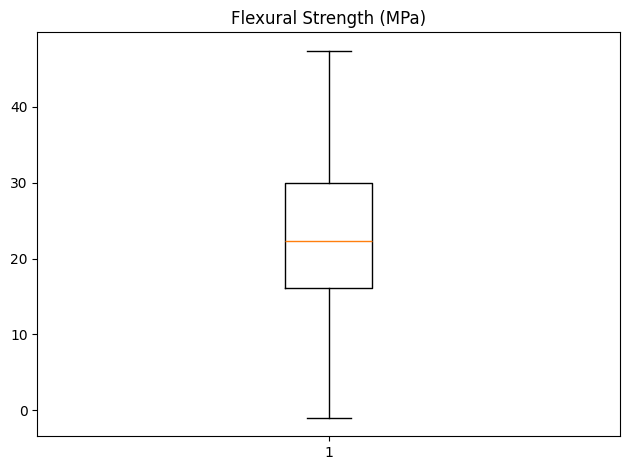

In [9]:
for col in df.drop(['Fiber Type','Additive Type'],axis=1).columns:
    plt.title(col)
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [10]:
Q1 = df['Compressive Strength (MPa)'].quantile(0.25)
Q3 = df['Compressive Strength (MPa)'].quantile(0.75)

IQR = Q3 - Q1

upper_whisker = Q3+1.5*IQR
lower_whisker = Q1-1.5*IQR

df = df[(df['Compressive Strength (MPa)']<upper_whisker)&(df['Compressive Strength (MPa)']>lower_whisker)]

In [11]:
df

,Fiber Type,Fiber Concentration,Aging,Additive Type,Additive Concentration,Compressive Strength (MPa),Flexural Strength (MPa)
0,Carbon fiber,0,2,Expanded Clay Powder,0,13.2,13.7
1,Carbon fiber,0,2,Expanded Clay Powder,5,11.9,13.9
2,Carbon fiber,0,2,Expanded Clay Powder,10,12.3,11.8
3,Carbon fiber,0,2,Expanded Clay Powder,20,13.1,12.5
4,Carbon fiber,0,2,Fly Ash,0,11.5,13.7
...,...,...,...,...,...,...,...
1019,Steel fiber,5,180,Perlite Powder,20,43.1,45.5
1020,Steel fiber,5,180,Expanded Vermiculite,0,43.5,46.6
1021,Steel fiber,5,180,Expanded Vermiculite,5,43.4,46.7
1022,Steel fiber,5,180,Expanded Vermiculite,10,43.9,45.1


In [12]:
OHE = preprocessing.OneHotEncoder(sparse_output=False).set_output(transform='pandas')
df = df.join(OHE.fit_transform(df[['Additive Type','Fiber Type']])).drop(['Additive Type','Fiber Type'],axis=1)

In [13]:
print((df.corr().abs()['Flexural Strength (MPa)']).sort_values(ascending=False))
print('-'*47)
print((df.corr().abs()['Compressive Strength (MPa)']).sort_values(ascending=False))

Flexural Strength (MPa)               1.000000
Aging                                 0.697480
Compressive Strength (MPa)            0.667051
Fiber Concentration                   0.505823
Fiber Type_PP fiber                   0.229043
Fiber Type_Carbon fiber               0.156367
Fiber Type_Steel fiber                0.144826
Fiber Type_Basalt fiber               0.071946
Additive Concentration                0.001409
Additive Type_Expanded Vermiculite    0.001259
Additive Type_Perlite Powder          0.000634
Additive Type_Fly Ash                 0.000449
Additive Type_Expanded Clay Powder    0.000176
Name: Flexural Strength (MPa), dtype: float64
-----------------------------------------------
Compressive Strength (MPa)            1.000000
Aging                                 0.953338
Flexural Strength (MPa)               0.667051
Fiber Type_Basalt fiber               0.113640
Fiber Type_PP fiber                   0.053698
Fiber Type_Carbon fiber               0.043453
Fiber Type_St

<Axes: >

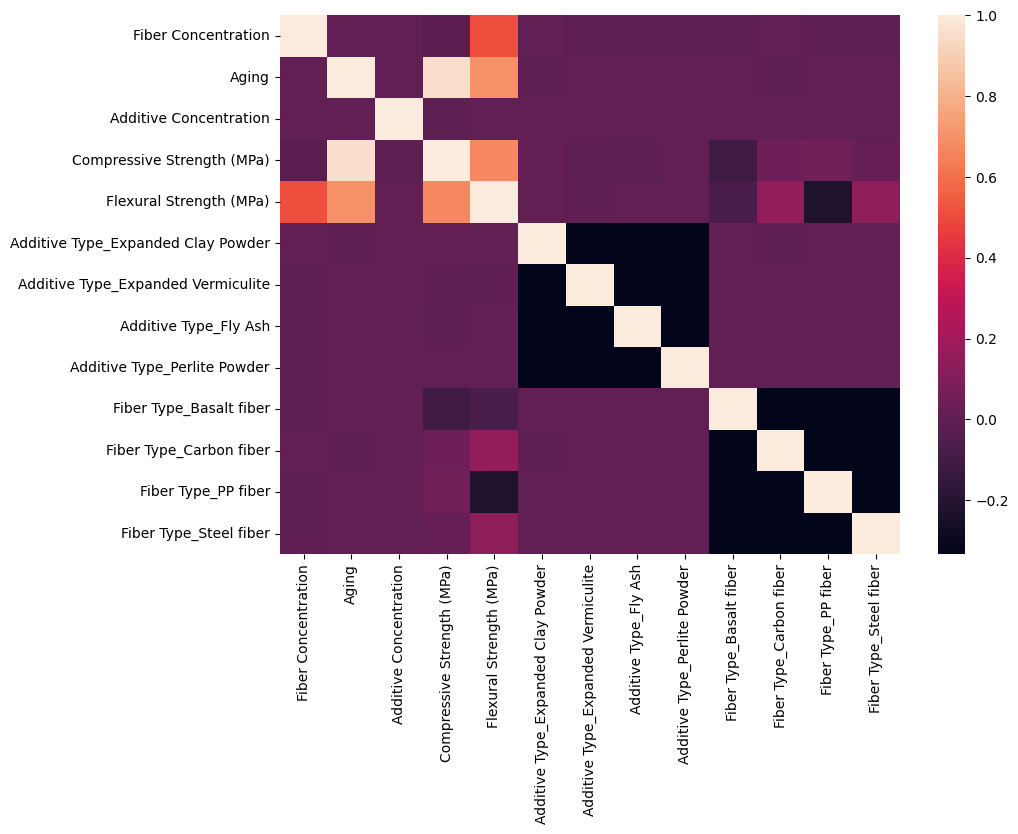

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),linecolor='black')

In [15]:
df1 = df.drop(df.corr()[~(df.corr().abs()['Flexural Strength (MPa)']>=0.1)].index,axis=1)

### Flexural Strength (MPa)

In [79]:
X1 = df1.drop(['Compressive Strength (MPa)','Flexural Strength (MPa)'],axis=1)
y1 = df1['Flexural Strength (MPa)']

Xtrain,Xtest,ytrain,ytest = train_test_split(X1,y1,train_size=0.8,random_state=42)

model = DecisionTreeRegressor(random_state=42,criterion='squared_error',max_depth=10,min_samples_leaf=1,min_samples_split=10)
model.fit(Xtrain,ytrain)

pred = model.predict(Xtest)
print(metrics.r2_score(ytest,pred))
print(metrics.mean_squared_error(ytest,pred))

0.9915439950770817
0.8273123418423353


In [80]:
cvs = cross_val_score(model,Xtrain,ytrain,cv=10,scoring='neg_mean_squared_error')
cvs = -cvs
print(cvs)
print(cvs.mean())

[0.83294283 0.62412588 0.85249685 0.71245616 0.84990264 0.89840774
 0.63437812 0.77662468 0.83813843 0.72996231]
0.774943564435089


In [65]:
# مدل درخت تصمیم‌گیری رگرسیون
dt = DecisionTreeRegressor(random_state=42)

# تعریف پارامترهای مورد نظر برای جستجو
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [3, 5, 7, 9, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# تنظیم GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')

# اجرای GridSearchCV
grid_search.fit(Xtrain, ytrain)

# بهترین پارامترها و نتایج
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)


Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score (MSE): 0.774943564435089


C:\Users\hp\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
600 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\miniconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\miniconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1377, in fit
    super()._fit(
  File "C

### Compressive Strength (MPa)

In [33]:
df2 = df.drop(df.corr()[~(df.corr().abs()['Compressive Strength (MPa)']>=0.1)].index,axis=1)

In [34]:
df2

,Aging,Compressive Strength (MPa),Flexural Strength (MPa),Fiber Type_Basalt fiber
0,2,13.2,13.7,0.0
1,2,11.9,13.9,0.0
2,2,12.3,11.8,0.0
3,2,13.1,12.5,0.0
4,2,11.5,13.7,0.0
...,...,...,...,...
1019,180,43.1,45.5,0.0
1020,180,43.5,46.6,0.0
1021,180,43.4,46.7,0.0
1022,180,43.9,45.1,0.0


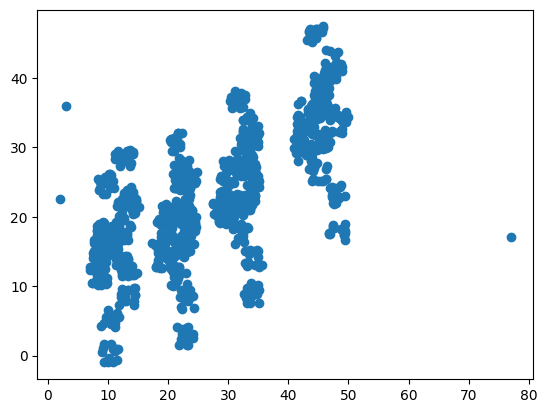

In [92]:
plt.scatter(df2['Compressive Strength (MPa)'],df2['Flexural Strength (MPa)'])

In [83]:
X2 = df1.drop(['Compressive Strength (MPa)','Flexural Strength (MPa)'],axis=1)
y2 = df1['Compressive Strength (MPa)']

Xtrain2,Xtest2,ytrain2,ytest2 = train_test_split(X2,y2,train_size=0.8,random_state=42)

model2 = DecisionTreeRegressor(random_state=42,criterion='absolute_error',max_depth=5,min_samples_leaf=1,min_samples_split=3)
model2.fit(Xtrain2,ytrain2)

pred2 = model2.predict(Xtest2)
print(metrics.r2_score(ytest2,pred2))
print(metrics.mean_squared_error(ytest2,pred2))

0.9645942974165418
5.856439024390243


In [84]:
cvs2 = cross_val_score(model2,Xtrain,ytrain2,cv=10,scoring='neg_mean_squared_error')
cvs2 = -cvs2
print(cvs2)
print(cvs2.mean())

[ 1.11817073  2.42        1.08189024  0.84841463 23.31018293 36.08560976
  1.05722561  0.89109756  0.78092593  0.96527778]
6.855879516711835


In [70]:
# مدل درخت تصمیم‌گیری رگرسیون
dt = DecisionTreeRegressor(random_state=42)

# تعریف پارامترهای مورد نظر برای جستجو
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [3, 5, 7, 9, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# تنظیم GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')

# اجرای GridSearchCV
grid_search.fit(Xtrain2, ytrain2)

# بهترین پارامترها و نتایج
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)


Best Parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best Score (MSE): 6.855879516711835


C:\Users\hp\miniconda3\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### MultiOut

In [106]:
X = df.drop(['Compressive Strength (MPa)','Flexural Strength (MPa)'],axis=1)
Y = df[['Compressive Strength (MPa)','Flexural Strength (MPa)']]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=42)

mymodel = MultiOutputRegressor(DecisionTreeRegressor(random_state=42,criterion='absolute_error',max_depth=10,min_samples_leaf=4,min_samples_split=10))
mymodel.fit(X_train,Y_train)

mypred = mymodel.predict(X_test)
print(metrics.r2_score(Y_test,mypred))
print(metrics.mean_squared_error(Y_test,mypred))

0.9756915490786695
3.6436219512195143


In [107]:
mycvs = cross_val_score(mymodel,X_train,Y_train,cv=10,scoring='neg_mean_squared_error')
mycvs = -mycvs
print(mycvs)
print(mycvs.mean())

[ 1.07724085  1.51358232  1.1585061   0.9908689  12.58525915 19.93879573
  1.03817073  1.08407012  1.00121914  1.08766975]
4.1475382791327915


In [105]:
# مدل درخت تصمیم‌گیری رگرسیون
dt = DecisionTreeRegressor(random_state=42)

# تعریف پارامترهای مورد نظر برای جستجو
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [3, 5, 7, 9, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# تنظیم GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')

# اجرای GridSearchCV
grid_search.fit(X_train, Y_train)

# بهترین پارامترها و نتایج
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

Best Parameters: {'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score (MSE): 4.0140468985245406


C:\Users\hp\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
600 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\miniconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\miniconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1377, in fit
    super()._fit(
  File "C